In [2]:
using PyPlot

type State
    mean::Float64
    var::Float64
end


In [21]:
function update(x::State, m, v)
    K = (x.var) / (x.var + v) # Eq. 1-8 from Maybeck paper
    x.mean = x.mean + K*(m - x.mean) # Eq. 1-7 from Maybeck paper
    x.var = x.var - K*(x.var) # Eq. 1-9 from Maybeck paper
    nothing
end

update (generic function with 1 method)

In [27]:
result = State(1.2, 0.1)

data = 1 + 0.1.*randn(50)
uncertainty = 0.1
mean_trace = ones(50)
var_trace = ones(50)

one = ones(50)
x = [1:50;]

for i = 1:49
    update(result, data[i], uncertainty)
    mean_trace[i+1] = result.mean
    var_trace[i+1] = result.var
end

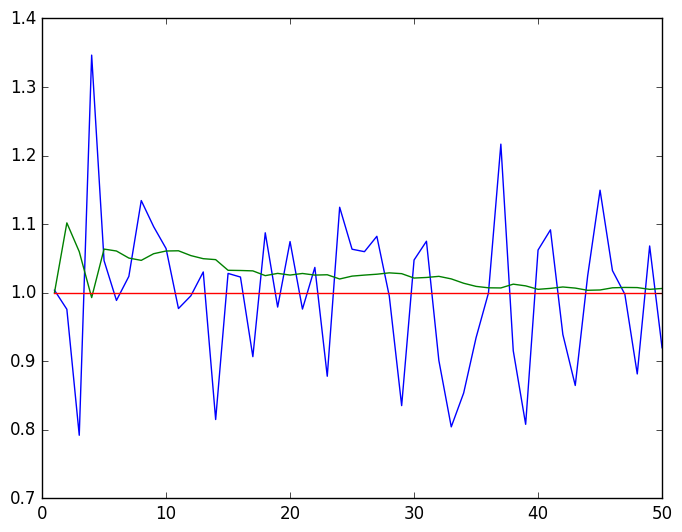

In [28]:
hold(true)
plot(x, data)
plot(x, mean_trace)
plot(x, one)
hold(false)